- generar el árbol de decisión con a lo más 2 divisiones más de profundidad
- alcular la matriz de confusión
- comparar con la matriz de confusión del árbol generado sin podar

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:

iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Árbol con profundidad máxima de 2
tree_depth2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_depth2.fit(X_train, y_train)

# Predecir
y_pred_depth2 = tree_depth2.predict(X_test)

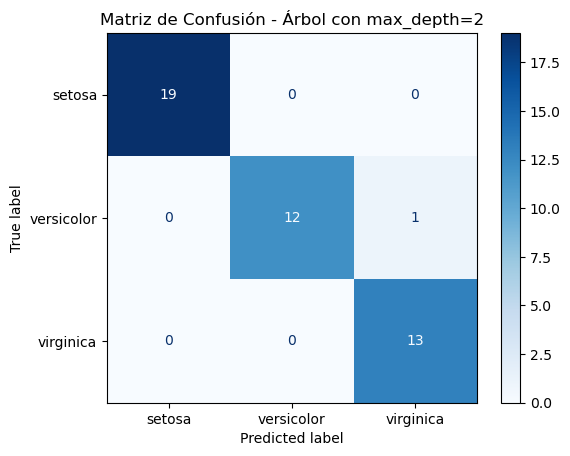

In [4]:
# Calcular y mostrar matriz de confusión
cm_depth2 = confusion_matrix(y_test, y_pred_depth2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_depth2, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Árbol con max_depth=2")
plt.show()

In [5]:
# Árbol sin podar (profundidad ilimitada)
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

# Predecir
y_pred_full = tree_full.predict(X_test)

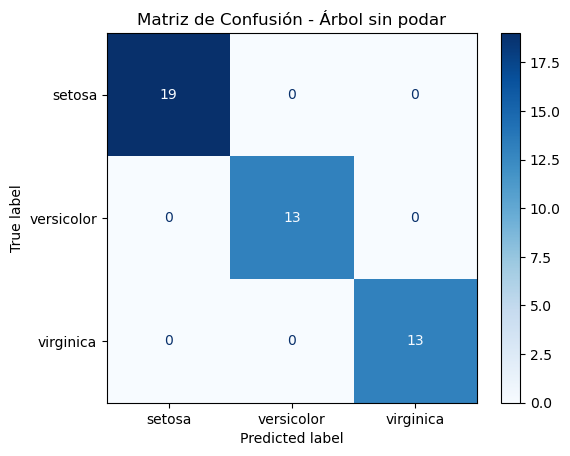

In [6]:
cm_full = confusion_matrix(y_test, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_full, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Árbol sin podar")
plt.show()

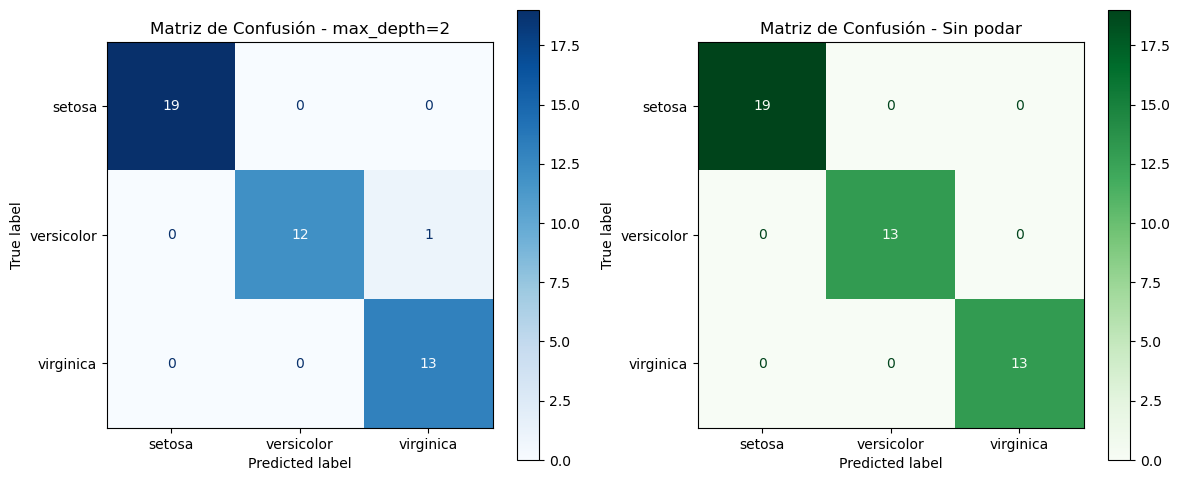

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz del árbol podado
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_depth2, display_labels=iris.target_names)
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de Confusión - max_depth=2")

# Matriz del árbol sin podar
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_full, display_labels=iris.target_names)
disp2.plot(ax=axes[1], cmap='Greens')
axes[1].set_title("Matriz de Confusión - Sin podar")

plt.tight_layout()
plt.show()


- Las matrices de confusión serán muy similares en este dataset, ya que Iris es un conjunto limpio y bien separable.